# Emotional





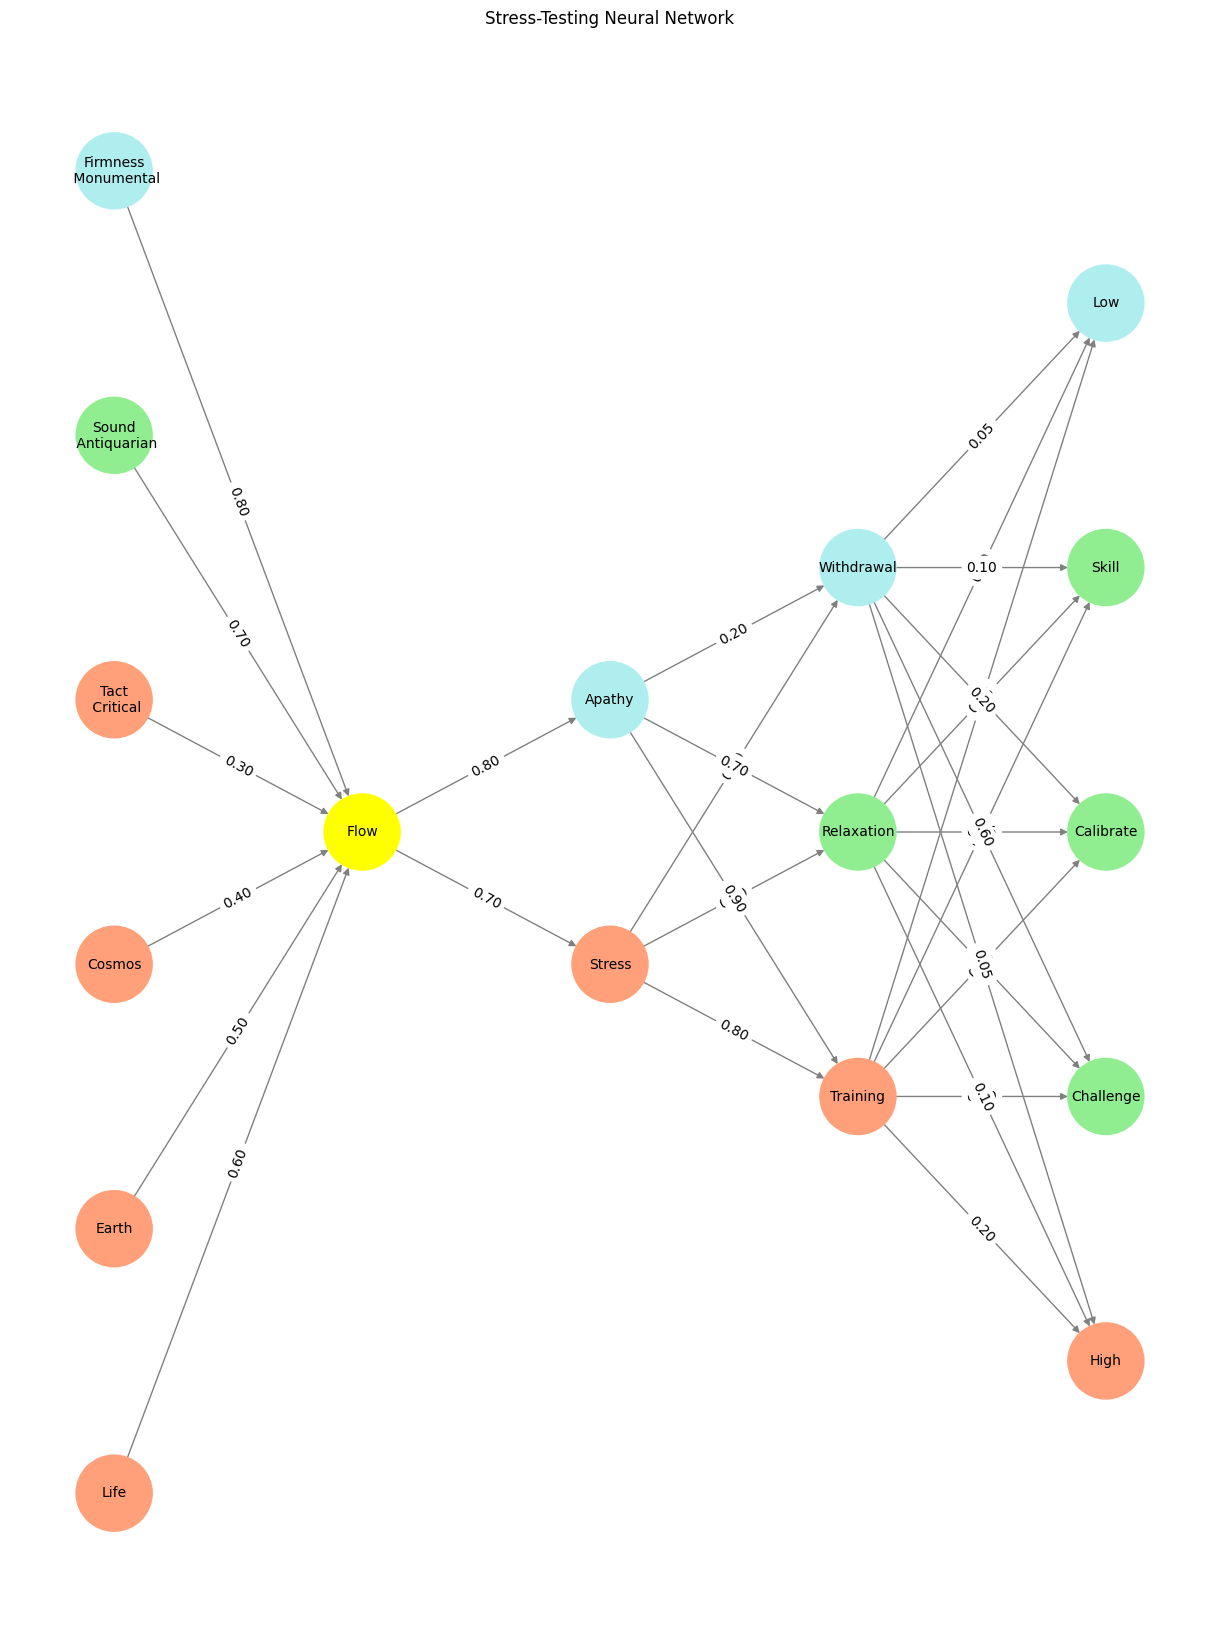

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Tact\n Critical', 'Sound\n Antiquarian', 'Firmness\n Monumental',],
        'Yellowstone': ['Flow'],
        'Input': ['Stress', 'Apathy'],
        'Hidden': [
            'Training',
            'Relaxation',
            'Withdrawal',
        ],
        'Output': ['High', 'Challenge', 'Calibrate', 'Skill', 'Low',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Flow':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound\n Antiquarian']:
        return 'lightgreen'
    if layer == 'Pre-Input' and node in ['Firmness\n Monumental']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Apathy':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Withdrawal':
            return 'paleturquoise'
        elif node == 'Relaxation':
            return 'lightgreen'
        elif node == 'Training':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Low':
            return 'paleturquoise'
        elif node in ['Skill', 'Calibrate', 'Challenge']:
            return 'lightgreen'
        elif node == 'Hight':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Stress-Testing Neural Network")
    plt.show()

# Run the visualization
visualize_nn()

```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Challenge_vs_skill.svg/600px-Challenge_vs_skill.svg.png
---
width: 100%
height: 100%
---
_Colors Match our Neural Network Model_. Mental state in terms of challenge level and skill level, according to [Csikszentmihalyi's flow model](https://news.uchicago.edu/story/mihaly-csikszentmihalyi-pioneering-psychologist-and-father-flow-1934-2021). The low-skill of anxiety speaks to adversarial transformation, very dynamic in nature that one can only adapt to but never really be well trained for. By contrast, the high-skill of relaxation speaks to culturual homogeneity embodied in heritage, which most adults have mastered. Flow speaks to transactional tokenized settings, wherein rules are somewhat well established -- but there's dynamism that leaks in from adversarial settings. Imagine the neural network as the gradual rise of water in a vast, dynamic ecosystem. At the base, the red nodes pulse like molten magma, vibrant and raw, representing primal energy—the starting point of transformation. With training and calibration, this lava cools and solidifies into yellow, a symbol of emerging order, a river carving its path through the landscape. As the system learns, the water level rises, touching green nodes, which embody flourishing life and iterative growth, where stability begins to bloom amidst the chaos. The verdant hues suggest harmony, a sign that the network is finding its rhythm and the currents are smoothing over time. Finally, with near-zero error—a state of mastery and equilibrium—the system reaches the blue nodes, the serene expanse of a tranquil sea. Here, every ripple aligns, every connection hums with precision, and the water, having risen and filled the network, becomes an ocean of understanding.
```